【問題1】練習のために特徴量の選択

データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [1]:
import missingno as msno
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model #線形回帰のためのモジュール
from sklearn.metrics import r2_score #R2を計算するためのモジュール
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
import warnings #ワーニング関連のモジュール？
warnings.filterwarnings('ignore') #ワーニングが消える？
csv_path = "train.csv" # ファイル名（パス）を指定する

'''学習用データの読み込み'''
df = pd.read_csv("train_1.csv")
#print(df)

# 目的変数
y = df.loc[:,["SalePrice"]]

#説明変数
X = df.loc[:,["GrLivArea","YearBuilt"]]

print(X)
print(y)

      GrLivArea  YearBuilt
0          1710       2003
1          1262       1976
2          1786       2001
3          1717       1915
4          2198       2000
...         ...        ...
1455       1647       1999
1456       2073       1978
1457       2340       1941
1458       1078       1950
1459       1256       1965

[1460 rows x 2 columns]
      SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1455     175000
1456     210000
1457     266500
1458     142125
1459     147500

[1460 rows x 1 columns]


【問題2】線形回帰による推定と評価

データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

【問題3】手法の比較

以下のすべての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

線形回帰

R2(Train) :  0.641
R2(Test) :  0.690
MSE値 :  2069416093.331
RMSE値 :  45490.835


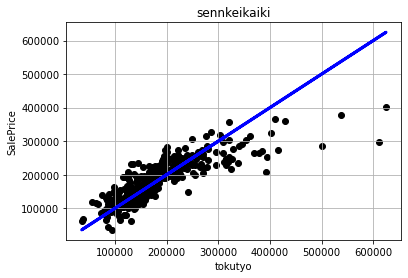

In [2]:
# トレーニングデータ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#print(X_train)

'''回帰モデルの作成'''
#モジュール読み込み、モデル構築
reg = linear_model.LinearRegression()

#モデルの学習
reg.fit(X_train,y_train) 

#予測値の算出
y_train_pred = reg.predict(X_train) #トレーニングデータでの予測
y_test_pred = reg.predict(X_test) #検証用データでの予測

#print(y_pred)
'''予測結果の確認'''
#決定係数を表示
print('R2(Train) : % 0.3f' % r2_score(y_train,  y_train_pred))
print('R2(Test) : % 0.3f' % r2_score(y_test, y_test_pred))
print("MSE値 : % 0.3f" % mean_squared_error(y_test, y_test_pred))
print("RMSE値 : % 0.3f" % mean_squared_error(y_test, y_test_pred, squared=False))

'''Plot outputs'''
plt.title("sennkeikaiki")
plt.scatter(y_test,y_test_pred,  color='black')
plt.plot(y_test,y_test, color='blue', linewidth=3)
plt.xlabel("tokutyo")
plt.ylabel("SalePrice")
plt.grid(True)
plt.show()


SVM

R2(Train) :  0.617
R2(Test) :  0.505
MSE値 :  3301369615.151
RMSE値 :  57457.546


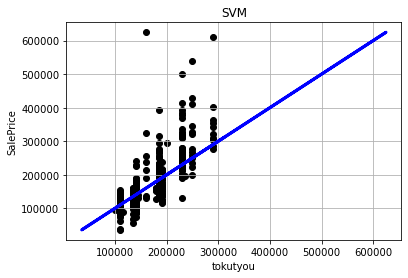

In [19]:
''''''''''''''''''''''''''''''''''''
'''SVMモデルの作成'''
#モジュール読み込み、モデル構築
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf1 = make_pipeline(StandardScaler(), SVC())
#モデルの学習
clf1.fit(X_train,y_train) 

#予測値の算出
y_train_pred = clf1.predict(X_train) #トレーニングデータでの予測
y_test_pred = clf1.predict(X_test) #検証用データでの予測

#print(y_pred)
'''予測結果の確認'''
#決定係数を表示
print('R2(Train) : % 0.3f' % r2_score(y_train,  y_train_pred))
print('R2(Test) : % 0.3f' % r2_score(y_test, y_test_pred))
print("MSE値 : % 0.3f" % mean_squared_error(y_test, y_test_pred))
print("RMSE値 : % 0.3f" % mean_squared_error(y_test, y_test_pred, squared=False))

'''Plot outputs'''
plt.title("SVM")
plt.scatter(y_test_pred,y_test,color='black')
plt.plot(y_test,y_test, color='blue', linewidth=3)
plt.xlabel("tokutyou")
plt.ylabel("SalePrice")
plt.grid(True)
plt.show()

決定木

R2(Train) :  0.997
R2(Test) :  0.597
MSE値 :  2684656869.554
RMSE値 :  51813.675


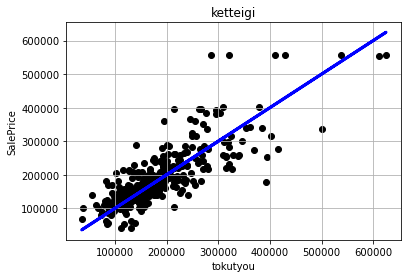

In [9]:
''''''''''''''''''''''''''''''''''''
'''決定木モデルの作成'''
#モジュール読み込み、モデル構築
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
clf2 = DecisionTreeRegressor(random_state=0)

#モデルの学習
clf2.fit(X_train,y_train) 

#予測値の算出
y_train_pred = clf2.predict(X_train) #トレーニングデータでの予測
y_test_pred = clf2.predict(X_test) #検証用データでの予測

#print(y_pred)
'''予測結果の確認'''
#決定係数を表示
print('R2(Train) : % 0.3f' % r2_score(y_train,  y_train_pred))
print('R2(Test) : % 0.3f' % r2_score(y_test, y_test_pred))
print("MSE値 : % 0.3f" % mean_squared_error(y_test, y_test_pred))
print("RMSE値 : % 0.3f" % mean_squared_error(y_test, y_test_pred, squared=False))

'''Plot outputs'''
plt.title("ketteigi")
plt.scatter(y_test,y_test_pred,  color='black')
plt.plot(y_test,y_test, color='blue', linewidth=3)
plt.xlabel("tokutyou")
plt.ylabel("SalePrice")
plt.grid(True)
plt.show()

ランダムフォレスト

R2(Train) :  0.597
R2(Test) :  0.602
MSE値 :  2652321379.886
RMSE値 :  51500.693


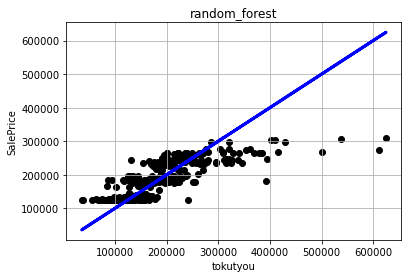

In [4]:
''''''''''''''''''''''''''''''''''''
'''ランダムフォレストモデルの作成'''
#モジュール読み込み、モデル構築
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
clf3 = RandomForestRegressor(max_depth=2, random_state=0)

#モデルの学習
clf3.fit(X_train,y_train) 

#予測値の算出
y_train_pred = clf3.predict(X_train) #トレーニングデータでの予測
y_test_pred = clf3.predict(X_test) #検証用データでの予測

#print(y_pred)
'''予測結果の確認'''
#決定係数を表示
print('R2(Train) : % 0.3f' % r2_score(y_train,  y_train_pred))
print('R2(Test) : % 0.3f' % r2_score(y_test, y_test_pred))
print("MSE値 : % 0.3f" % mean_squared_error(y_test, y_test_pred))
print("RMSE値 : % 0.3f" % mean_squared_error(y_test, y_test_pred, squared=False))

'''Plot outputs'''
plt.title("random_forest")
plt.scatter(y_test,y_test_pred,  color='black')
plt.plot(y_test,y_test, color='blue', linewidth=3)
plt.xlabel("tokutyou")
plt.ylabel("SalePrice")
plt.grid(True)
plt.show()

考察

R2(Train)の値は決定木が高く、R2(Test)の値は線形回帰とランダムフォレストに倍近くの差が出ました。
MSEやRMSEは線形回帰の値が突出して良い結果になったと見受けられました。